In [1]:
def circulant(n, L):

    E = []

    for i in range(n):

        for j in range(i+1, n):

            if(((i-j) % n) in L):

                if({i, j} not in E):

                    E.append({i, j})

    # Return the graph
    return E

In [9]:
from sage.graphs.graph_coloring import vertex_coloring
def is_kcrit(G,k):
    V = G.vertices()
    chi = G.chromatic_number()
    if(chi != k):
        return False
    
    for v in V:
        H = Graph(G) #creates local copy of G so we can delete vertices and maintain G's structure
        H.delete_vertex(v)
        if vertex_coloring(H, k=k-1, value_only=True) == False:
            return False
    return True

In [7]:
G = Graph(circulant(29,[7,9,10,11,12,13,14,15,16,17,18,19,20,22]))

In [10]:
is_kcrit(G, 5)

True

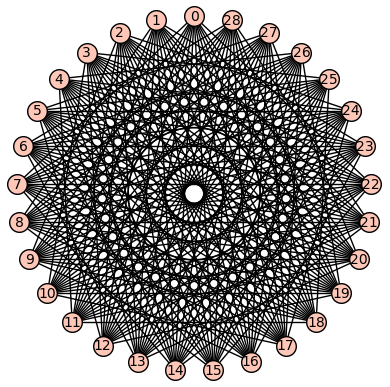

In [11]:
G.show(layout="circular")

In [12]:
H = Graph(circulant(13,[3,5,6,7,8,10]))

In [14]:
is_kcrit(H,5)

True

In [15]:
# The following is a generalizing the Gr and Gp constructions for 4- and 5-crit graphs, resp. to create
# an infinite family of (k+1)-crit graphs for each k>=2
def Gq(q, k):
    L = []
    
    for i in range(0, k*q+1):
        e1 = {i, (i+1) % (k*q+1)}
        e2 = {i, (i-1) % (k*q+1)}
        
        if e1 not in L:
            L.append(e1)

        if e2 not in L:
            L.append(e2)

        for j in range(0, q):
            for m in range(2, k):
                e1 = {i, (i+k*j+m) % (k*q+1)}

                if e1 not in L:
                    L.append(e1)

    return Graph(L)

In [16]:
H.is_isomorphic(Gq(3,4))

False

In [17]:
G.is_isomorphic(Gq(7,4))

False

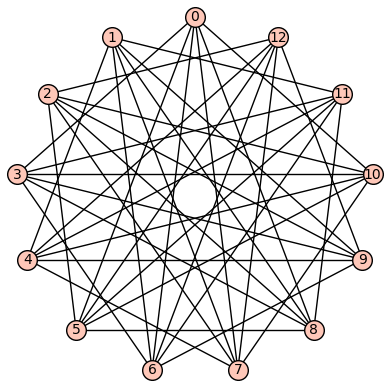

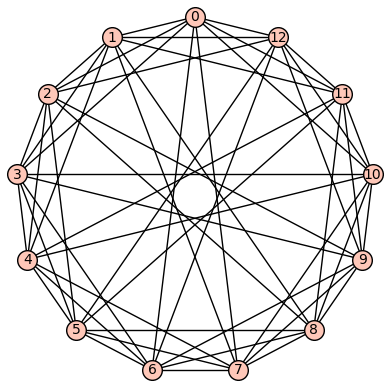

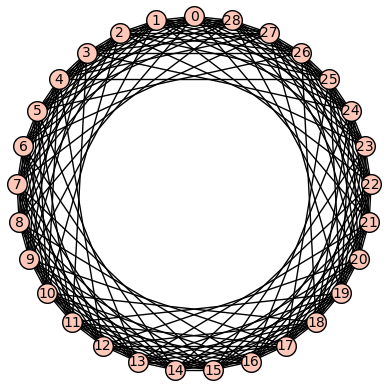

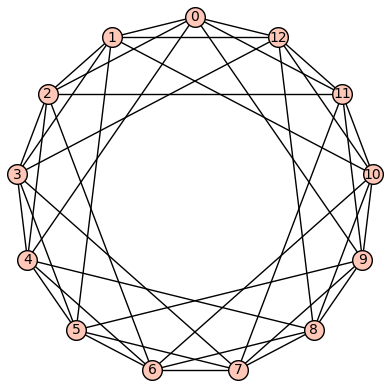

In [20]:
H.show(layout="circular")
Gq(3,4).show(layout="circular")
G.complement().show(layout="circular")
H.complement().show(layout="circular")

In [32]:
# need p>=3.
# returns the list of parameters for a circulant graph on 4p+1 vertices that always appears to be 5-critical.
def potential_list(p):
    L= [i for i in range(p+2,3*p)]
    L.append(p)
    L.append(3*p+1)
    L.sort()
    return L

In [33]:
for i in range(3,7):
    print(potential_list(i))

[3, 5, 6, 7, 8, 10]
[4, 6, 7, 8, 9, 10, 11, 13]
[5, 7, 8, 9, 10, 11, 12, 13, 14, 16]
[6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]


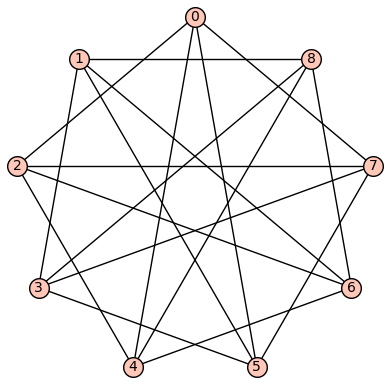

3

In [35]:
G9 = Graph(circulant(9, potential_list(2)))
G9.show(layout="circular")
G9.chromatic_number()

In [36]:
for p in range(3,12):
    G = Graph(circulant(4*p+1,potential_list(p)))
    print(is_kcrit(G,5))

True
True
True
True
True
True
True
True
True
